In [11]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt 

In [12]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [13]:
noisy_X = np.random.normal(0, 4, size=X.shape) + X

In [14]:
example_digits = noisy_X[y==0, :][: 10]
for i in range(1, 10):
    example_digits =  np.vstack([example_digits, noisy_X[y==i, :][: 10]])

In [15]:
example_digits.shape

(100, 64)

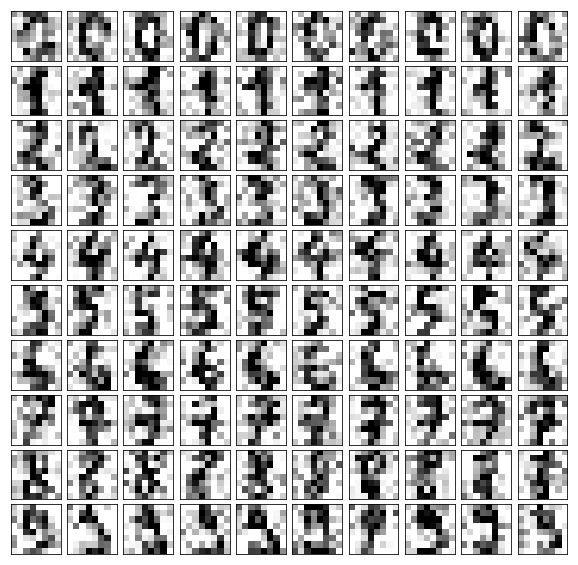

In [22]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), 
                subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary',
                  interpolation='nearest',clim=(0, 16))
    plt.show()
plot_digits(example_digits)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(0.5).fit(noisy_X)
pca.n_components_

12

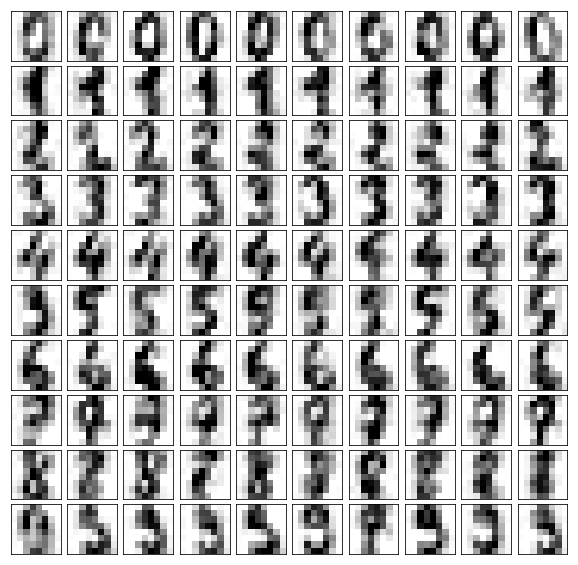

In [25]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)